# Predicting with Trees
- Split Variables into groups
- Better performance in nonlinear settings
- Should be used with cross-validation

## Measures of Impurity:
- Missclassification Error:
    - Perfect purity: 0
    - No purity: 0.5
- Gini Index:
    - Perfect purity: 0
    - No purity: 0.5
- Deviance/Information Gain:
    - Perfect purity: 0
    - No purity: 1

## Example of Impurity:
- Splitting a Varibale into 16 with 15:1 ratio
    - Missclassification: 1/16 = 0.6
    - Gini: 1 - [(1/16)^2 + (15/16)^2] = 0.12
    - Information: -[1/16 x log2(1/16) + (15/16) x log2(15/16] = 0.34
- Splitting a Varibale into 16 with 8:8 ratio
    - Missclassification: 8/16 = 0.5
    - Gini: 1 - [(8/16)^2 + (8/16)^2] = 0.5
    - Information: -[8/16 x log2(8/16) + (8/16) x log2(8/16] = 1

## Example with Iris Data

In [4]:
library(caret)
library(ggplot2)
data(iris)
names(iris)

Loading required package: lattice


[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [2]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [5]:
# Data Partition
inTrain <- createDataPartition(y = iris$Species, p = 0.7, list = FALSE)

# Sub-set titanic data to Train and to Test
training <- iris[inTrain, ]
testing <- iris[-inTrain, ]
dim(training)
dim(testing)

[1] 105   5

[1] 45  5

## Plot Petal width vs Sepal width
- 3 distinct groups

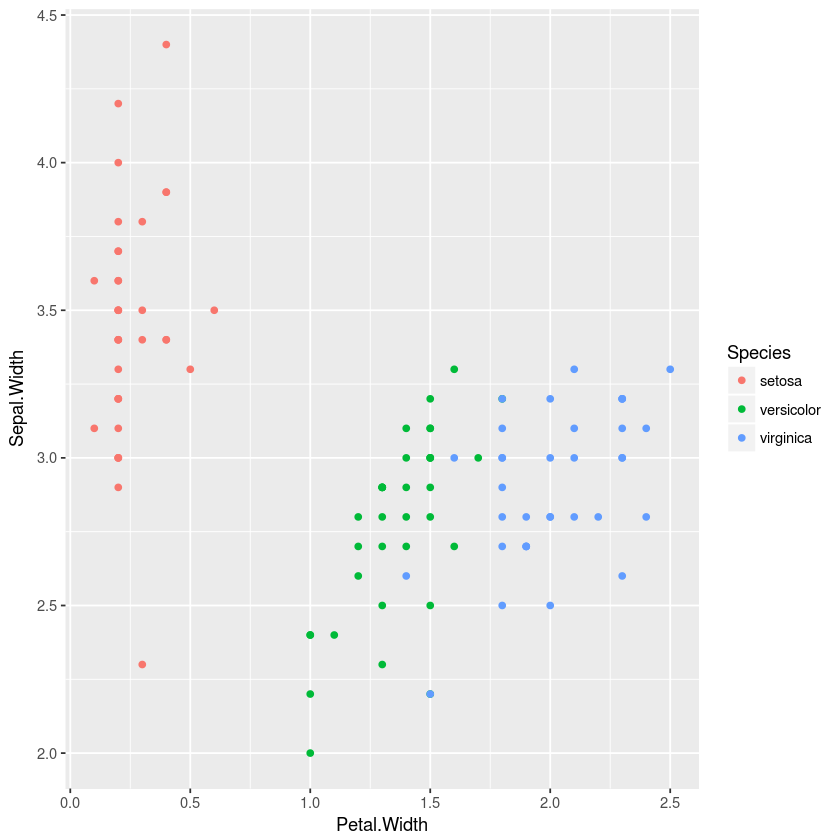

In [6]:
qplot(Petal.Width, Sepal.Width, color = Species, data = training)

## Train a Model

In [7]:
modelFit <- train(Species ~ ., method = "rpart", data = training)
modelFit$finalModel

Loading required package: rpart


n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 70 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.5 35  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.5 70 35 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 37  3 versicolor (0.00000000 0.91891892 0.08108108) *
    7) Petal.Width>=1.75 33  1 virginica (0.00000000 0.03030303 0.96969697) *

## Plot the Tree

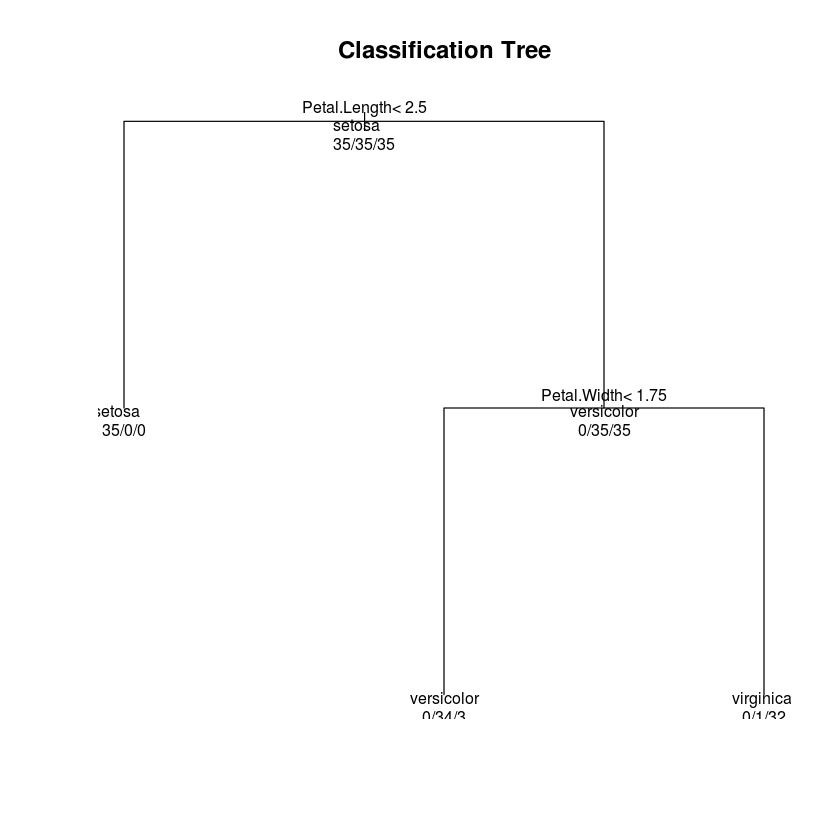

In [11]:
plot(modelFit$finalModel, uniform = T, main = "Classification Tree")
text(modelFit$finalModel, use.n = T, all =T, cex = 0.8)

## Predict on Test set

In [14]:
pred <- predict(modelFit, newdata = testing)
pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  versicolor virginica  virginica  virginica 
[37] virginica  virginica  virginica  versicolor virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [15]:
confusionMatrix(testing$Species, pred)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          2        13

Overall Statistics
                                          
               Accuracy : 0.9556          
                 95% CI : (0.8485, 0.9946)
    No Information Rate : 0.3778          
    P-Value [Acc > NIR] : 2.61e-16        
                                          
                  Kappa : 0.9333          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8824           1.0000
Specificity                 1.0000            1.0000           0.9375
Pos Pred Value              1.0000            1.0000           0.8667
Neg Pred Value              1.0000            0.9333           1.0000
Prevalence                  0.3333          